In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from keras.optimizers import Adam

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
base_path = "/content/drive/MyDrive/Colab Notebooks/data/oes/"
data = pd.read_csv(base_path + "oes.csv")

In [7]:
data = data.drop(columns='Time(sec)')

In [10]:
X = data.drop(columns='777.295')
y = data['777.295']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.shape

(700, 3647)

In [30]:
model = Sequential([
                    Dense(1024, activation='relu', input_dim=X_train.shape[1]),
                    Dense(256, activation='relu'),
                    Dense(64, activation="relu"),
                    Dense(64, activation="relu"),
                    Dense(1, activation="linear",) 
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1024)              3735552   
                                                                 
 dense_25 (Dense)            (None, 256)               262400    
                                                                 
 dense_26 (Dense)            (None, 64)                16448     
                                                                 
 dense_27 (Dense)            (None, 64)                4160      
                                                                 
 dense_28 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,018,625
Trainable params: 4,018,625
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(optimizer=Adam(), loss='mean_squared_error')

In [33]:
history = model.fit(X_train, y_train, batch_size=16, epochs=100)

Epoch 1/100
44/44 [==============================] - 1s 24ms/step - loss: 13118.4199
Epoch 2/100
44/44 [==============================] - 1s 24ms/step - loss: 7701.8271
Epoch 3/100
44/44 [==============================] - 1s 24ms/step - loss: 8841.8096
Epoch 4/100
44/44 [==============================] - 1s 24ms/step - loss: 4537.6299
Epoch 5/100
44/44 [==============================] - 1s 24ms/step - loss: 4447.4868
Epoch 6/100
44/44 [==============================] - 1s 23ms/step - loss: 8362.0117
Epoch 7/100
44/44 [==============================] - 1s 23ms/step - loss: 16201.2412
Epoch 8/100
44/44 [==============================] - 1s 24ms/step - loss: 4407.3071
Epoch 9/100
44/44 [==============================] - 1s 23ms/step - loss: 14010.7910
Epoch 10/100
44/44 [==============================] - 1s 24ms/step - loss: 16669.6562
Epoch 11/100
44/44 [==============================] - 1s 23ms/step - loss: 11031.4756
Epoch 12/100
44/44 [==============================] - 1s 23ms/step - 

In [36]:
test_loss = model.evaluate(X_test, y_test)
print('Test accuracy:', test_loss)

6/6 [==============================] - 0s 11ms/step - loss: 2802.8374
Test accuracy: 2802.83740234375


In [37]:
result = model.predict(X_test)
result

6/6 [==============================] - 0s 10ms/step


array([[2852.538 ],
       [2838.5544],
       [3019.4832],
       [2847.    ],
       [3337.3862],
       [2838.2861],
       [2848.2598],
       [2836.1287],
       [2882.3105],
       [2847.8325],
       [2838.7766],
       [2840.127 ],
       [3329.2434],
       [2839.1597],
       [2834.4185],
       [3334.0903],
       [2840.4995],
       [3330.8938],
       [3336.2822],
       [2839.1184],
       [2834.608 ],
       [3336.8723],
       [3333.599 ],
       [2842.5151],
       [2840.3945],
       [3342.9324],
       [2838.3933],
       [2835.1929],
       [3329.0354],
       [2835.5864],
       [2848.276 ],
       [2839.8584],
       [2843.228 ],
       [2846.2832],
       [3342.3853],
       [2838.8413],
       [2842.037 ],
       [2836.728 ],
       [2840.1963],
       [2853.287 ],
       [3338.6318],
       [3341.8938],
       [2846.1636],
       [2835.3757],
       [3327.5808],
       [3339.3613],
       [2840.3325],
       [2849.0225],
       [3327.0774],
       [2838.9863],


In [56]:
result_df = pd.DataFrame(result)

In [51]:
y_df = pd.DataFrame(y_test)

In [54]:
y_df.reset_index(drop=True, inplace=True)

In [58]:
fianl = pd.concat([result_df, y_df], axis=1)

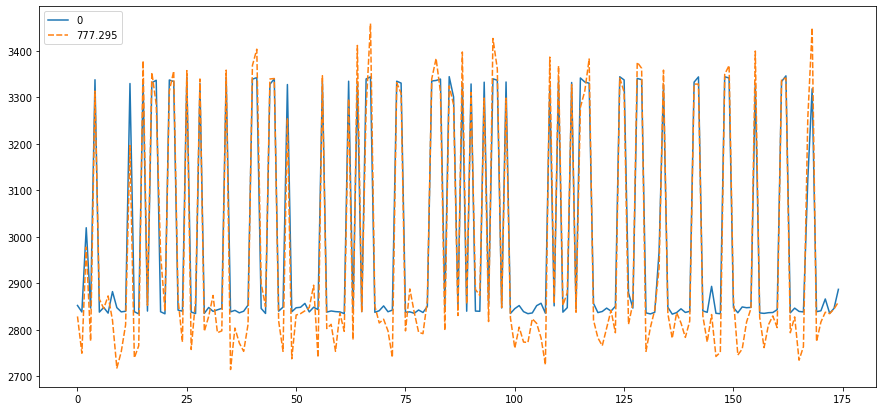

In [60]:
plt.figure(figsize=(15,7))
sns.lineplot(data=fianl, legend=True)
plt.savefig("oxygen_pred_DL.png")